==============================================================================================
## Practicum 5: Image search using textures
==============================================================================================



The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture and color

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.


## Delivery

All code sould be commented in English. Answers of the questions should be given in English too.

Compressed file **P5_Student1_Student2.zip** that includes:
- The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P5.zip.

**Deadline (Campus Virtual): Desember 12th, 11:00 p.m.** 


 The function should return a feature vector obtained by averaging each filter response on the image.  

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

## Looking at the images

In [1]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
import os

import matplotlib.pyplot as plt

In [2]:
path = "./images/texturesimages/buildings/"
building_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/forest/"
forest_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/sunset/"
sunset_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

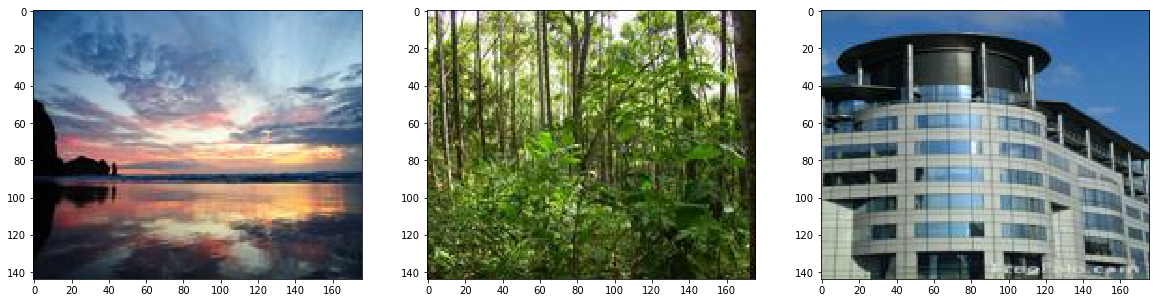

In [3]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(sunset_images[0])
ax[1].imshow(forest_images[0])
ax[2].imshow(building_images[0])
plt.show()

In [4]:
len(sunset_images), len(forest_images), len(sunset_images)

(30, 30, 30)

# Filter banks

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


## Leung-Malik (LM) Filter Bank

In [5]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [6]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

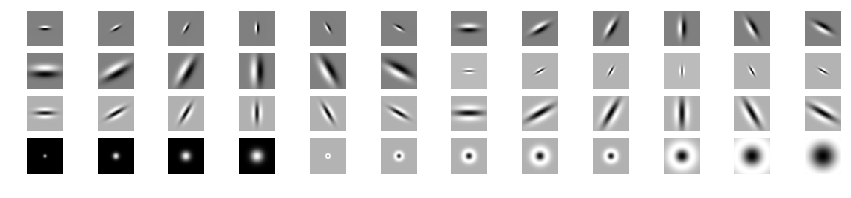

In [7]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1


## Exercise 5.1 Plot the convolved image by some of the filters


Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png">


(144, 176)


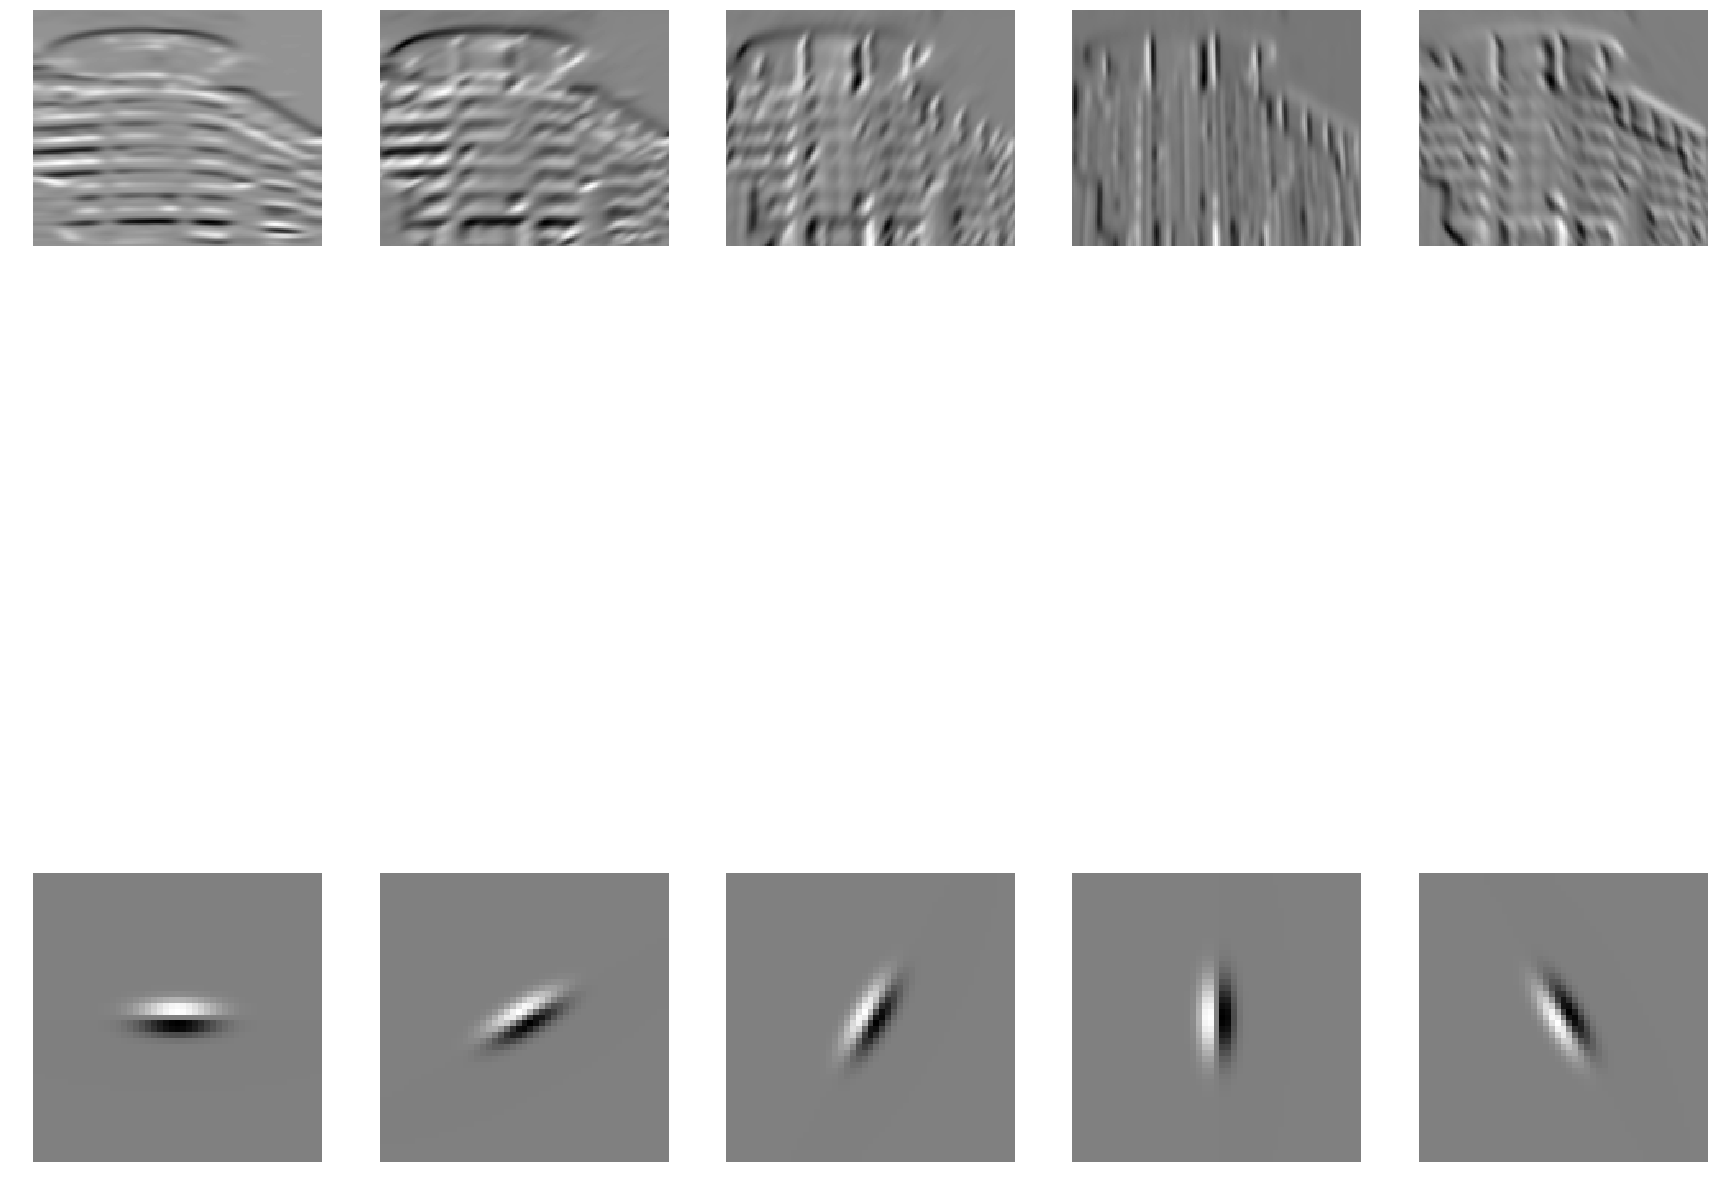

In [8]:
from scipy import ndimage
im = building_images[0]
im = skimage.color.rgb2gray(building_images[0])
print (im.shape)

im_copy = im.copy()



def visualize_features(im,filter_bank, n_filters=5):
    fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,30))
    k=0
    im_copy=im.copy()
    for i in range(n_filters):
        im_copy = ndimage.convolve(im,filter_bank[:,:,k])
        ax[0,k].imshow(im_copy, cmap = 'gray')
        ax[0,k].axis("off")
        ax[1,k].imshow(filter_bank[:,:,k],cmap="gray")
        ax[1,k].axis("off")   
        k = k + 1
    plt.show()    
                
    
                
         
visualize_features(im,filter_bank, n_filters=5)    
   







## Exercise 5.2 Constructing a feature vector for a given image


Given $D$ filters from the filter bank and a single image `image`, make a function `features_from_filter_bank(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$



In [9]:
from skimage.color import rgb2gray
from scipy import ndimage
def features_from_filter_bank(image, filter_bank, n_filters):
    ## Complete this function
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    
    for i in range(n_filters):
        im_conv= ndimage.convolve(image,filter_bank[:,:,i],mode="wrap")
        features_for_im[i] = (np.mean(np.absolute(im_conv)))
  
    return features_for_im

n_filters=10


## Exercise 5.3 Constructing the matrix of the feature vectors for all images

Implement a function `get_class_Features(all_images, filter_bank)` that applies `features_from_filter_bank` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.


Wall time: 7min 49s

In [10]:
all_images = building_images + forest_images + sunset_images

In [115]:
%%time
from skimage.color import rgb2gray
def get_class_features(all_images,  filter_bank):

    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    all_feature_vectors=np.zeros((n_images,filter_bank.shape[-1]))
    print (n_images)
    for i in range(n_images):
        all_feature_vectors[i]= features_from_filter_bank(rgb2gray(all_images[i]), filter_bank, n_filters)
    # Complete

    return all_feature_vectors

all_feature_vectors=get_class_features(all_images,  filter_bank)
print (all_feature_vectors)

90
[[ 0.02287628  0.0168325   0.01342253 ...,  0.12205312  0.03876849
   0.00289684]
 [ 0.01289049  0.0117078   0.01266101 ...,  0.16582347  0.05267154
   0.00365112]
 [ 0.0165883   0.01378059  0.01210196 ...,  0.08881482  0.02821081
   0.00316784]
 ..., 
 [ 0.009385    0.00790403  0.00520166 ...,  0.12037504  0.03823547
   0.00301366]
 [ 0.01861832  0.01374213  0.01044561 ...,  0.08627085  0.02740275
   0.00350943]
 [ 0.01468752  0.01113969  0.00803442 ...,  0.08576932  0.02724344
   0.00210773]]
CPU times: user 7min 43s, sys: 26.4 s, total: 8min 9s
Wall time: 8min 10s


## Exercise 5.4 Visualizing the features of an image

Define a function `visualize_features` that given a feature index and an array containing all feature vectors, plots its values for the three datasets using different colors for each dataset (in total plots should contain 3 colors).


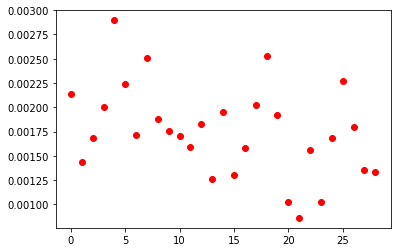

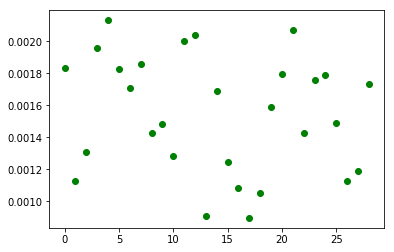

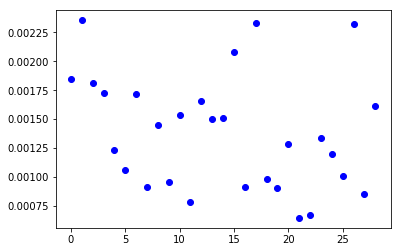

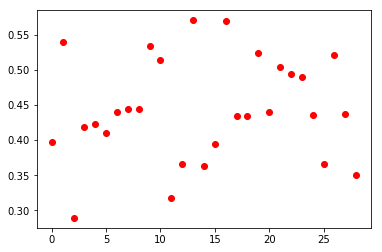

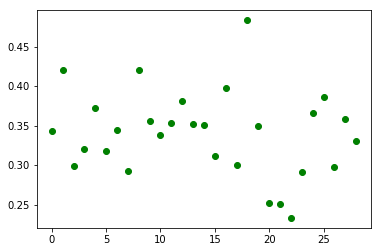

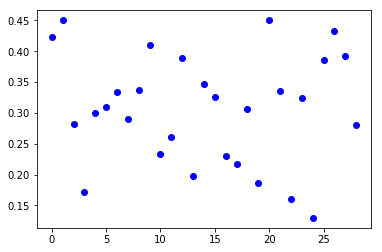

In [12]:
def visualize_features(k, all_feature_vectors):
    # complete
    plt.plot(all_feature_vectors[0:29,k],"o",color="r")
    plt.show()
    plt.plot(all_feature_vectors[30:59,k],"o",color="g")
    plt.show()
    plt.plot(all_feature_vectors[60:89,k],"o",color="b")
    plt.show()
    return None

visualize_features(25, all_feature_vectors)    
visualize_features(41, all_feature_vectors)    







#### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$


## Exercise 5.5 Retrieving the most similar images



Implement a function `retrieve_k_images_from_X(query, X, k)` where `query` is an image,  `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar images (according to the l2 norm) and the distances from the closest images to the query image. You can include the query image since it is in `X`.

- Make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

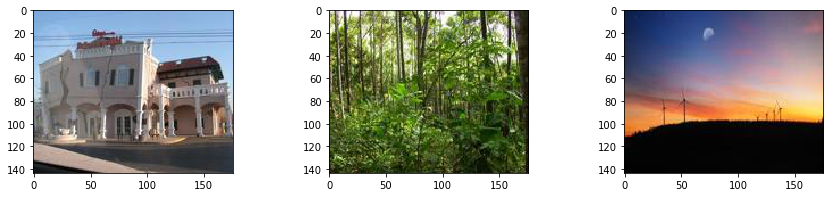

In [13]:
X = np.array(all_feature_vectors)
ind_1 = 6
ind_2 = 30
ind_3 = 65

query_1 = X[6, :]
query_2 = X[30,:]
query_3 = X[65,:]


# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[6]) 
ax[1].imshow(all_images[30])
ax[2].imshow(all_images[65])

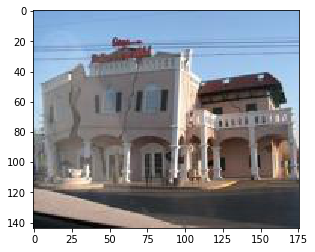

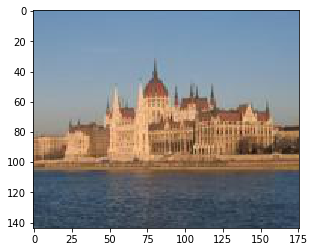

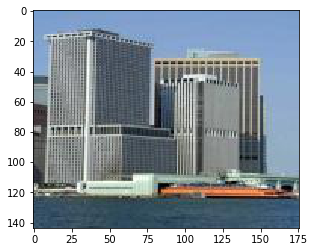

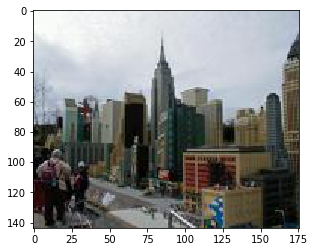

hola


In [39]:
from skimage.color import rgb2gray
def retrieve_k_images_from_X(query, X, k):
    #Complete
    distances = None
    closest_to_query = None
    closest_images =[]
    feat_query = features_from_filter_bank(query, filter_bank, 48)
    for i in range(len(X)):
        dist = np.linalg.norm(feat_query - X[i])
        img = [dist,i]
        closest_images.append(img)
    
    
    #closest_images = np.sort(closest_images,axis=0)
    
    #closest_images[closest_images[1,:].argsort()]
    #se esta perdiendo el index en el sort
    
    closest_images.sort()
    k_closest =[]
    
    #con el for de abajo imprimimos las 4 imagenes mas cercanas al query
    for i in range(k):
        plt.imshow(all_images[closest_images[i][1]])
        plt.show()
        k_closest.append(closest_images[i][1])
    
    
   
    
    
    
    #descartar lo de abajo
    #----------------------
    #minimo = 999999
    #min_index = -1
    #for i in range (len(closest_images)):
    #    if closest_images[i][0] < minimo:
    #        min_index = i
    #        minimo = closest_images[i][0]
    #
    #plt.imshow(all_images[min_index])
    #plt.show()
    #arriba solo estamos encontrando una imagen closest
    
    #--------------------
   
    
    #plt.imshow(all_images[closest_images[0][1].astype(int)])
    #plt.show()
   
    return closest_images, distances

query_1=rgb2gray(all_images[6])
images = retrieve_k_images_from_X(query_1,all_feature_vectors,4)
print ("hola")


In [28]:
lista = [3,2,4,5,0]
lista = [[3.2,0],[2.3,1],[4.3,2],[5.3,3],[0.1,4]]
print (lista)
lista.sort()
print (lista)

[[3.2, 0], [2.3, 1], [4.3, 2], [5.3, 3], [0.1, 4]]
[[0.1, 4], [2.3, 1], [3.2, 0], [4.3, 2], [5.3, 3]]


## Exercise 5.6 Compute the accuracy of the algorithm: given a query image. 

Make a function 

```
accuracy(X, class_labels, k=5, query=x, class_query=y)
```

That takes as input a the dataset `X`, the `class_labels` for the images, the number of images to retrieve `k`, a query image `x` and the class of the query image `y`. Returns as output the number of retrieved images that belong to class `y` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: be careful to exclude the query image from the retrieved images.

- Compute the accuracy with k=4 with the previous images. Does the accuracy match the images retrieved from the previous exercise?


In [52]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2*np.ones(30))).reshape(90,1)


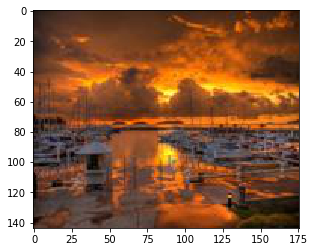

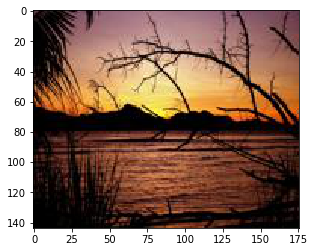

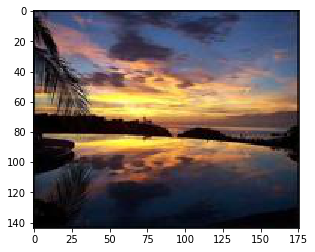

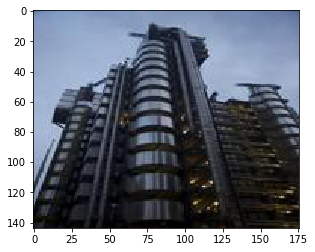

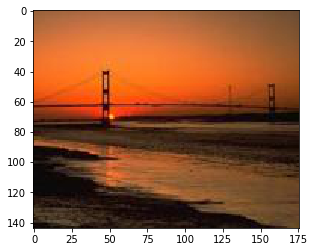

0.75


In [59]:
def accuracy(X, class_labels, k, query, class_query):
     # Complete
        
    distances = None
    closest_to_query = None
    closest_images =[]
    feat_query = features_from_filter_bank(query, filter_bank, 48)
    for i in range(len(X)):
        dist = np.linalg.norm(feat_query - X[i])
        img = [dist,i]
        closest_images.append(img)
    
    
    #closest_images = np.sort(closest_images,axis=0)
    
    #closest_images[closest_images[1,:].argsort()]
    #se esta perdiendo el index en el sort
    
    closest_images.sort()
    k_closest =[]
    
    #con el for de abajo imprimimos las k imagenes mas cercanas al query, incluido el query, que sale el primero
    for i in range(k):
        plt.imshow(all_images[closest_images[i][1]])
        plt.show()
        k_closest.append(closest_images[i][1])
        
        
        
    #sumador para contar los aciertos    
    sum_aciertos=0
    for i in range(k-1):
        if class_query == class_labels[k_closest[i+1]]:
            sum_aciertos = sum_aciertos+1
        
    #calculamos la accuracy dividiendo sobre k-1 para descartar el query, de la acc
    acc = sum_aciertos/(k-1)
    return acc



query_1=rgb2gray(all_images[89])
class_query = class_labels[89]


print (accuracy(all_feature_vectors, class_labels, 5, query_1, class_query))

## Exercise 5.7 Image retrieval based on texture and color. 

Make a function ` lm_features_rgb(image, filter_bank)`  that returns the features from the filter bank concatenated by color features. What is the dimension of the new feature space?


In [98]:
from skimage.color import rgb2gray
from scipy import ndimage
def lm_features_rgb(image, filter_bank):
    
    #color features
    
    sum_red=0
    sum_green=0
    sum_blue=0
    
    #sumamos todos los valores RGB de la imagen, en un sumador independiente cada componente
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum_red = sum_red+image[i][j][0]
            sum_green = sum_green+image[i][j][1]
            sum_blue = sum_blue+image[i][j][2]
    
    #sacamos la media de cada canal RGB
    sum_red = sum_red/(i*j)
    sum_green = sum_green/(i*j)
    sum_blue = sum_blue/(i*j)
    
            
    
    image_gray = rgb2gray(image)
    n_filters = len(filter_bank)-1
    #--------------------------
    
    ## Complete this function
    im_conv = np.zeros(image_gray.shape)
    features_for_im = np.zeros(n_filters+3)
    
    for i in range(n_filters):
        im_conv= ndimage.convolve(image_gray,filter_bank[:,:,i],mode="wrap")
        features_for_im[i] = (np.mean(np.absolute(im_conv)))
    
    
    features_for_im[n_filters] = sum_red
    features_for_im[n_filters+1] = sum_green
    features_for_im[n_filters+2] = sum_blue
   
    return features_for_im
  
    


    #--------------------------


In [99]:
%%time 

print (lm_features_rgb(all_images[0], filter_bank))

[  2.28762812e-02   1.68324961e-02   1.34225285e-02   1.61716855e-02
   1.50651920e-02   2.01088216e-02   1.32520374e-02   8.22381247e-03
   7.51254488e-03   9.41122395e-03   8.44136935e-03   1.01671728e-02
   7.56167989e-03   5.52714579e-03   5.44617802e-03   6.49502352e-03
   6.20384385e-03   6.76927968e-03   1.28694829e-02   6.94005610e-03
   5.58754785e-03   9.61378371e-03   6.60932348e-03   9.03616154e-03
   4.65302473e-03   2.13512524e-03   1.65346158e-03   2.86757319e-03
   1.94618997e-03   2.96791351e-03   1.88992256e-03   8.87567322e-04
   8.48377146e-04   1.32101532e-03   9.68131949e-04   1.24094789e-03
   1.58945706e+00   3.17891412e+00   4.76837112e+00   6.35764429e+00
   7.94728531e-01   3.97364265e-01   2.64909376e-01   1.98562727e-01
   2.64909376e-01   1.22053115e-01   3.87684911e-02   2.89684387e-03
   9.79526074e+01   1.19500939e+02   1.31592927e+02]
CPU times: user 5.01 s, sys: 215 ms, total: 5.22 s
Wall time: 5.22 s



## Exercise 5.8 Apply the function to all the images in the dataset

Using ` lm_features_rgb(image, filter_bank)` build the features of all the datapoints in and save them in `X_lm_rgb`.
You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [116]:
from skimage.color import rgb2gray

n_images = len(all_images)
n_filters = filter_bank.shape[-1]
all_feature_vectors_color=np.zeros((n_images,n_filters+3))
for i in range(n_images):
    all_feature_vectors_color[i] = lm_features_rgb(all_images[i], filter_bank)

print (all_feature_vectors_color)



[[  2.28762812e-02   1.68324961e-02   1.34225285e-02 ...,   9.79526074e+01
    1.19500939e+02   1.31592927e+02]
 [  1.28904870e-02   1.17077984e-02   1.26610059e-02 ...,   1.39130989e+02
    1.60559201e+02   1.78779461e+02]
 [  1.65883026e-02   1.37805853e-02   1.21019617e-02 ...,   7.73628771e+01
    8.47795804e+01   9.94330869e+01]
 ..., 
 [  9.38500032e-03   7.90403241e-03   5.20166155e-03 ...,   1.41045155e+02
    1.08605435e+02   9.06145455e+01]
 [  1.86183188e-02   1.37421280e-02   1.04456116e-02 ...,   1.13747532e+02
    7.50187413e+01   5.55725874e+01]
 [  1.46875239e-02   1.11396944e-02   8.03442439e-03 ...,   1.25806194e+02
    7.25406993e+01   3.80208192e+01]]


## 5.9 Compute the accuracy of the method using lm rgb features

Use the function implemented in 5.6 to compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

- Is the accuracy higher?

In [117]:
# compute (X_lm_rgb) and cast it as array
#X_lm_rgb = np.array(X_lm_rgb)

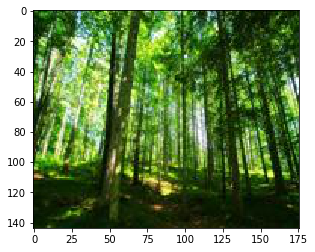

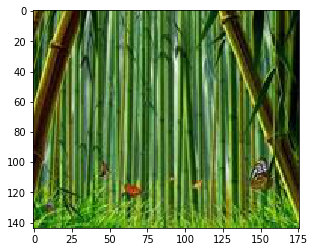

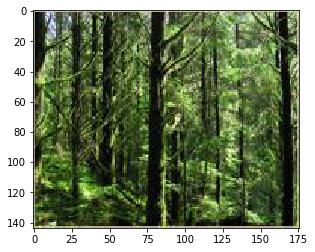

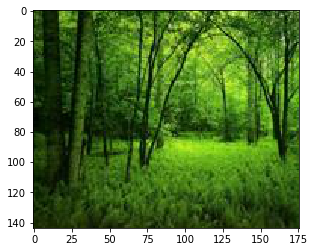

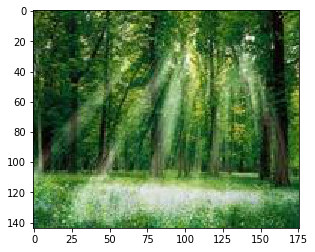

1.0


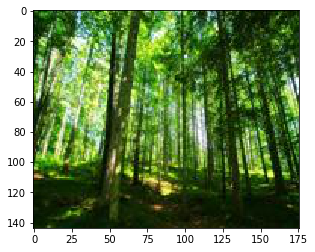

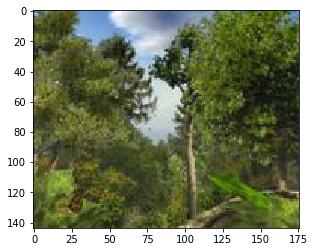

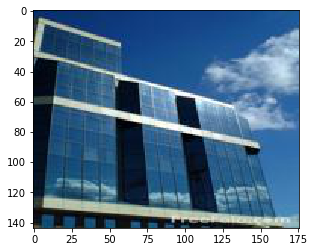

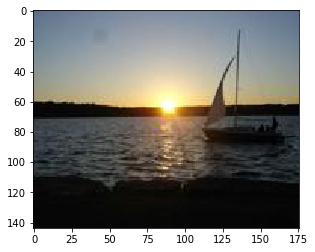

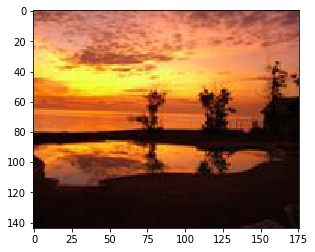

0.25


In [126]:
def accuracyColor(X, class_labels, k, query, class_query):
     # Complete
        
    distances = None
    closest_to_query = None
    closest_images =[]
    feat_query = lm_features_rgb(query, filter_bank)
    for i in range(len(X)):
        dist = np.linalg.norm(feat_query - X[i])
        img = [dist,i]
        closest_images.append(img)
    
    
    #closest_images = np.sort(closest_images,axis=0)
    
    #closest_images[closest_images[1,:].argsort()]
    #se esta perdiendo el index en el sort
    
    closest_images.sort()
    k_closest =[]
    
    #con el for de abajo imprimimos las k imagenes mas cercanas al query, incluido el query, que sale el primero
    for i in range(k):
        plt.imshow(all_images[closest_images[i][1]])
        plt.show()
        k_closest.append(closest_images[i][1])
        
        
        
    #sumador para contar los aciertos    
    sum_aciertos=0
    for i in range(k-1):
        if class_query == class_labels[k_closest[i+1]]:
            sum_aciertos = sum_aciertos+1
        
    #calculamos la accuracy dividiendo sobre k-1 para descartar el query, de la acc
    acc = sum_aciertos/(k-1)
    return acc



query_1=all_images[33]
query_1_grey = rgb2gray(query_1)

class_query = class_labels[33]


print (accuracyColor(all_feature_vectors_color, class_labels, 5, query_1, class_query))
print (accuracy(all_feature_vectors, class_labels, 5, query_1_grey, class_query))3
#
#yes, the accuracyColor is higher than the accuracy
#